### carregamos o dataset

In [1]:
import pandas as pd 

resenhas = pd.read_csv('imdb-reviews-pt-br.csv')

# sera necessario limitar o numero de resenhas - 50% dos dados
resenhas = resenhas.sample(frac = 0.50).reset_index(drop=True)

troca = {
    'neg' : 0,
    'pos' : 1
}

resenhas['sentiment_b'] = resenhas.sentiment.map(troca)
resenhas = resenhas.drop(columns = ["id" , "text_en", "sentiment"], axis = 1)

all_texts = [text for text in resenhas.text_pt]
all_ = ' '.join(all_texts)

### retirando as pontuações, as stops words 

In [2]:
import nltk

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("portuguese")

import re

# tudo lowercase
for index, row in resenhas.iterrows():
    resenhas.at[index,'text_pt'] = row['text_pt'].lower()
    
# elimina as stop words
for index, row in resenhas.iterrows():
    # retorna apenas as palavras - eliminando os pnts de sinalizacao
    words = re.findall(r"[\w']+", row['text_pt'])
    temp = [ws for ws in words if ws not in stop_words]
    resenhas.at[index,'text_pt'] = ' '.join(temp)

# retiramos os acentos das palavras
# retiramos tb as stop words sem acento
import unidecode

for index, row in resenhas.iterrows():
    resenhas.at[index,'text_pt'] = unidecode.unidecode(row['text_pt'])
    
stop_words_sem_acentuacao = [unidecode.unidecode(sw) for sw in stop_words]

for index, row in resenhas.iterrows():
    # retorna apenas as palavras - eliminando os pnts de sinalizacao
    words = re.findall(r"[\w']+", row['text_pt'])
    temp = [ws for ws in words if ws not in stop_words_sem_acentuacao]
    resenhas.at[index,'text_pt'] = ' '.join(temp)

[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemização
## reduzimos os elementos a um radical comum 
### reduz uma palavra com determinadas variações a um radical comum
###  Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações
#### exemplo : correria, corredor, correr : 'corr'

In [3]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/pedro/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [4]:
stemmer = nltk.RSLPStemmer()

for index, row in resenhas.iterrows():
    #retorna apenas as palavras - eliminando os pnts de sinalizacao
    words = re.findall(r"[\w']+", row['text_pt'])
    temp = [stemmer.stem(ws) for ws in words]
    resenhas.at[index,'text_pt'] = ' '.join(temp)

### atualiza as variaveis

In [5]:
# atualiza as variaveis
all_texts = [text for text in resenhas.text_pt]
all_ = ' '.join(all_texts)

### Plota o grafico de pareto

    Palavra  Frequência
3      film       96081
184     tod       22944
168     pod       21956
290   algum       19015
29      faz       18740
84      ser       18551
217    real       18295
112    sobr       14822
294    outr       14541
80    parec       13755


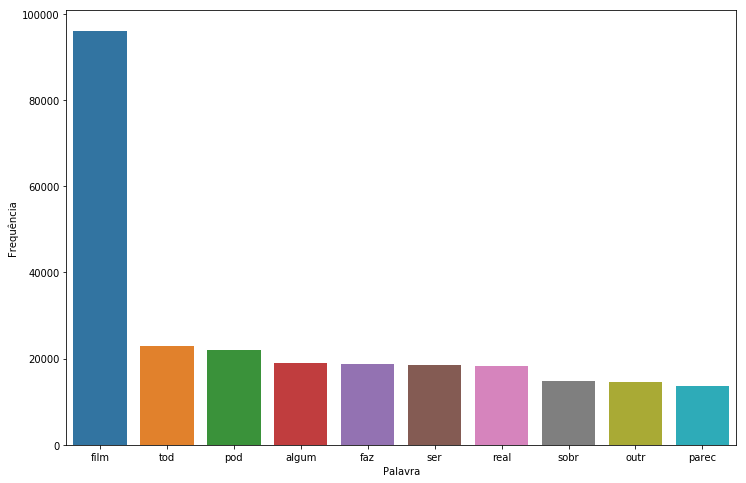

In [6]:
from nltk import tokenize

tokenizador = tokenize.WhitespaceTokenizer()
tokens = tokenizador.tokenize(all_)

frequencia = nltk.FreqDist(tokens)

import pandas as pd
df_frequencia = pd.DataFrame({
    "Palavra" : list(frequencia.keys()),
    "Frequência" : list(frequencia.values())
})

## mostra as palavras de maior frequencia
most_frequency = df_frequencia.nlargest(
    columns = "Frequência" , 
    n = 10)

print(most_frequency)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,8))
ax = sns.barplot(
    data = most_frequency,
    x = "Palavra",
    y = "Frequência")
plt.show()

### repetimos a classificacao

In [7]:
# cria o bag of words
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer(lowercase = False , max_features = 50)
bag_of_words = vetorizador.fit_transform(resenhas.text_pt)

# estratifica os dados
from sklearn.model_selection import train_test_split

SEED = 20
treino, teste, classe_treino, classe_teste = train_test_split(
    bag_of_words,
    resenhas.sentiment_b,
    random_state = SEED)

# realiza a classificacao
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(solver = 'lbfgs')
modelo.fit(treino,classe_treino)
modelo.score(teste,classe_teste)

0.7017628982694485